<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/12-Image%20and%20Video%20Analytics/OpenCV/Image_Processing_With_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.analyticsvidhya.com/blog/2021/09/a-beginners-guide-to-image-processing-with-opencv-and-python/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29

In [1]:
import cv2
from google.colab.patches import cv2_imshow

In [2]:
!wget https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/Images/mandrill.jpg

--2021-09-08 14:33:19--  https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/Images/mandrill.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11403 (11K) [image/jpeg]
Saving to: ‘mandrill.jpg’

mandrill.jpg        100%[===================>]  11.14K  --.-KB/s    in 0s      

2021-09-08 14:33:19 (92.5 MB/s) - ‘mandrill.jpg’ saved [11403/11403]



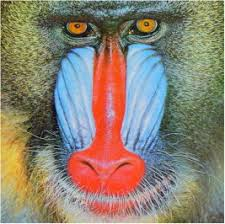

In [4]:
image = cv2.imread("""mandrill.jpg""")
cv2_imshow(image)
cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
print(image.shape)

(224, 225, 3)


In [6]:
h, w, c = image.shape
print("Dimensions of the image is:nnHeight:", h, "pixelsnWidth:", w, "pixelsnNumber of Channels:", c)

Dimensions of the image is:nnHeight: 224 pixelsnWidth: 225 pixelsnNumber of Channels: 3


In [8]:
print(type(image))

<class 'numpy.ndarray'>


In [ ]:
h, w, c = image.shape
print("Dimensions of the image is:nnHeight:", h, "pixelsnWidth:", w, "pixelsnNumber of Channels:", c)

Dimensions of the image is:nnHeight: 224 pixelsnWidth: 225 pixelsnNumber of Channels: 3


In [9]:
print(image.dtype)

uint8


In [10]:
print(image)

[[[180 212 223]
  [126 158 169]
  [140 172 183]
  ...
  [135 170 160]
  [174 205 196]
  [233 250 247]]

 [[128 160 171]
  [ 29  61  72]
  [ 33  65  76]
  ...
  [ 66 103  93]
  [ 81 112 103]
  [217 236 233]]

 [[136 166 177]
  [ 50  80  91]
  [ 35  67  78]
  ...
  [ 65 105  94]
  [ 81 115 105]
  [220 241 238]]

 ...

 [[176 176 158]
  [143 143 125]
  [152 150 132]
  ...
  [ 90  94  95]
  [ 77  82  81]
  [232 235 233]]

 [[183 180 165]
  [141 138 123]
  [139 134 119]
  ...
  [ 71  73  73]
  [ 64  66  66]
  [222 227 225]]

 [[255 255 244]
  [240 237 222]
  [255 251 236]
  ...
  [231 233 233]
  [227 230 228]
  [246 251 249]]]


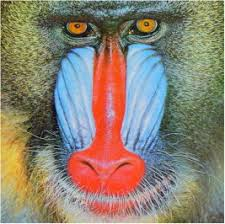

In [11]:
cv2_imshow(image)
k = cv2.waitKey(0)
if k == 27 or k == ord('q'):
    cv2.destroyAllWindows()


In [19]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [20]:
cv2.imwrite('Mandrill_grey.jpg', gray)

True

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
def extract_bit_plane(cd):
    #  extracting all bit one by one 
    # from 1st to 8th in variable 
    # from c1 to c8 respectively 
    c1 = np.mod(cd, 2)
    c2 = np.mod(np.floor(cd/2), 2)
    c3 = np.mod(np.floor(cd/4), 2)
    c4 = np.mod(np.floor(cd/8), 2)
    c5 = np.mod(np.floor(cd/16), 2)
    c6 = np.mod(np.floor(cd/32), 2)
    c7 = np.mod(np.floor(cd/64), 2)
    c8 = np.mod(np.floor(cd/128), 2)
    # combining image again to form equivalent to original grayscale image 
    cc = 2 * (2 * (2 * c8 + c7) + c6) # reconstructing image  with 3 most significant bit planes
    to_plot = [cd, c1, c2, c3, c4, c5, c6, c7, c8, cc]
    fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(10, 8), subplot_kw={'xticks': [], 'yticks': []})
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for ax, i in zip(axes.flat, to_plot):
        ax.imshow(i, cmap='gray')
    plt.tight_layout()
    plt.show()
    return cc

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


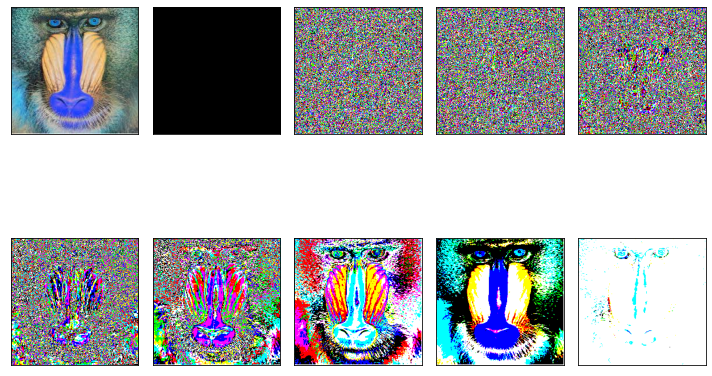

In [17]:
reconstructed_image = extract_bit_plane(image)

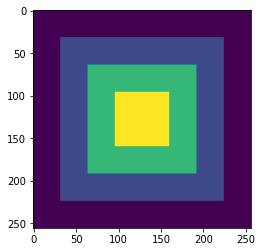

In [18]:
con_img = np.zeros([256, 256])
con_img[0:32, :] = 40 # upper row
con_img[:, :32] = 40 #left column
con_img[:, 224:256] = 40 # right column
con_img[224:, :] = 40 # lower row
con_img[32:64, 32:224] = 80 # upper row
con_img[64:224, 32:64] = 80 # left column
con_img[64:224, 192:224] = 80 # right column
con_img[192:224, 32:224] = 80 # lower row
con_img[64:96, 64:192] = 160 # upper row
con_img[96:192, 64:96] = 160 # left column
con_img[96:192, 160:192] = 160 # right column
con_img[160:192, 64:192] = 160 # lower row
con_img[96:160, 96:160] = 220
plt.imshow(con_img)